# **Classification of handwritten digits using classical machine learning methods with model optimization and evaluation on the Scikit-learn Digits dataset.**

# Load modules

In [ ]:
# ==============================================================================
"""
Using Handwritten Digit's Dataset (Scikit-learn), this workflow demonstrates machine learning (ML) techniques covered in the lectures, such as loading modules & data, data normalization, training various classifiers, performing hyperparameter tuning, evaluating the model's performance, and plotting the pertinent results.
"""
# Section: Loading pertinent Modules
# Aim: To establish an environment for our ML workflow.

# ==============================================================================

# Importing the standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Selecting the pertinent Data and Model
from sklearn.datasets import load_digits # One of Sklearn's toy-dataset
from sklearn.model_selection import train_test_split, GridSearchCV

# Metrics for evaluation
from sklearn.metrics import (precision_score, recall_score, f1_score, accuracy_score, balanced_accuracy_score, roc_curve, auc, confusion_matrix)
#NOTE: Tried using plt_roc_curve function first, but found out that it has been deprecated long back in the older scikit-learn version(s)

# Key classifiers used (Count: 8)
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.naive_bayes import GaussianNB #GNB
from sklearn.svm import SVC

# For binarizing multiclass labels
from sklearn.preprocessing import label_binarize

# For Data Normalization
from sklearn.preprocessing import StandardScaler

# Load data


          Digits Dataset Characteristics          

A. Sample Images from the Digits Dataset:



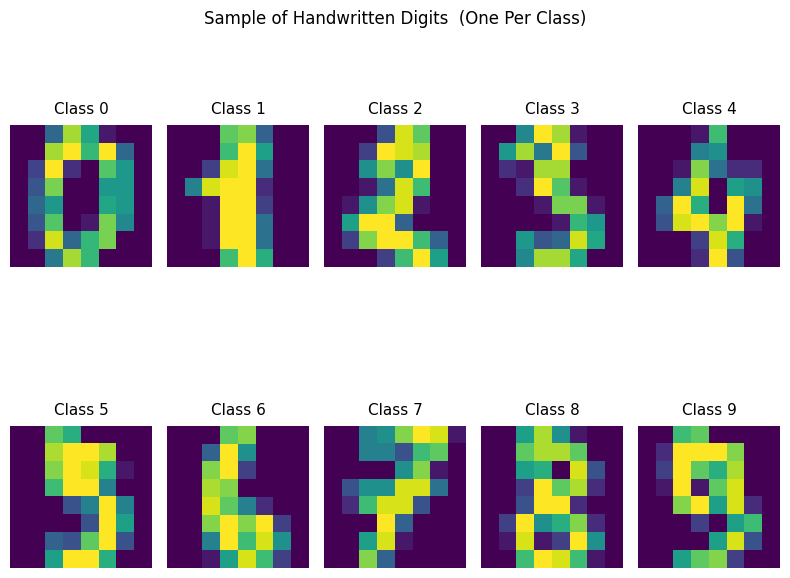


B. Class Labels: [0 1 2 3 4 5 6 7 8 9]

C. Dimensions of Digits Dataset:
   1. Total Samples : 1797
   2. Features per Sample : 64 (8x8 pixels)
   3. Target Classes : 10 (Digits 0-9)
   4. Image Size : 8x8 pixels
   5. Pixel Value Range : 0.0 to 16.0


Training set (80% of Total samples): (1437, 64)
Testing set (20% of Total samples): (360, 64)



In [ ]:
# ==============================================================================
# Section: Data Loading and Visualization
# Pseudocode:
# a. First, we load the digits dataset from scikit learn.
# b. Then we extract features (X) and label/ target (y) from this dataset.
# c. Thereafter, we display sample images to visually inspect the data.
# d. Finally, we print the dataset characteristics for context, such as number of samples, feature dimensions, available classes, and image dimensions.

# Note: Visualization is carried out to assist with data integrity before processing.
# ==============================================================================


# Loading the toy-dataset from scikit-learn i.e. "digits"
digits = load_digits()

# Features and target
X, y = digits.data, digits.target

# ==============================================================================
# Section: Digits Dataset Characteristics
# Pseudocode:
# a. First, we print a border header to emphasize on dataset information.
# b. Then we display the sample images for each of the digit's class.
# c. Finally, we show unique class labels and dimensions of the dataset.
# ==============================================================================

print("\n" + "="*50)
print("Digits Dataset Characteristics".center(50))
print("="*50)

# A. Showcasing samples from the Dataset
print("\nA. Sample Images from the Digits Dataset:\n")
fig, axes = plt.subplots(2, 5, figsize=(8, 8)) # 2 rows x 5 columns
fig.suptitle('Sample of Handwritten Digits  (One Per Class)', fontsize=12, y=0.9)

# Plotting one sample per class (0–9)
for clss in range(10):
    row = clss // 5  # Row index (0 or 1)
    col = clss % 5   # Column index (0–4)
    ax = axes[row, col]

    # Finding the first occurrence of the current class
    idx = np.where(digits.target == clss)[0][0]
    ax.imshow(digits.images[idx], cmap='viridis', interpolation='none')
    ax.set_title(f"Class {clss}", fontsize=11, pad=8)
    ax.axis('off')

plt.tight_layout()
plt.show()

# B. Classes from the Dataset
print("\nB. Class Labels:", np.unique(digits.target))

# C. Dimensionality & Other Aspects of the Dataset
print(f"""
C. Dimensions of Digits Dataset:
   1. Total Samples : {len(digits.data)}
   2. Features per Sample : {digits.data.shape[1]} (8x8 pixels)
   3. Target Classes : {len(digits.target_names)} (Digits 0-9)
   4. Image Size : {digits.images[0].shape[0]}x{digits.images[0].shape[1]} pixels
   5. Pixel Value Range : {digits.images.min()} to {digits.images.max()}
""")

# ==============================================================================
# Section: Train-Test Split and Preprocessing
# Pseudocode:
# a. First, we split the dataset into training (80%) and testing (20%) sets.
# b. Then we normalize the feature data using standard scaler.
# c. Finally, we print the shapes of the training and testing sets to confirm the split.
# Note: Proper splitting ensures that the model evaluation is free from biases.
# ==============================================================================

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizing the feature data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)  # Fitting & transforming training data
X_test = scaler.transform(X_test)  # Transforming test data using the same scaler

# To insert border around the heading
print("\n" + "="*50)
print(f"Training set (80% of Total samples): {X_train.shape}")
print(f"Testing set (20% of Total samples): {X_test.shape}")
print("="*50 + "\n")

# Classification

## Classification methods used

Mention the classification methods used below. You should not describe them, but if they have not been discussed in the class, you should cite the source:

1. Gradient Boosting (Friedman, 2001)
2. AdaBoost (Freund and Schapire, 1997)
3. Random Forest (Breiman, 2001)
4. Decision Tree (Quinlan, 1986)
5. Logistic Regression (Cox, 1958)
6. K-Nearest Neighbors (Cover and Hart, 1967)
7. Gaussian Naive Bayes (Mitchell T.M., 1997)
8. Support Vector Machine (Cortes and Vapnik, 1995)

## Training

In [ ]:
# ==============================================================================
# A. Section: Training the Default Classifiers
# Pseudocode:
# 1. First, we initialize all the classifiers with default parameters.
# 2. Then we fit all the classifiers on the training data.
# 3. Finally, we store the trained models for subsequent evaluation.
# ==============================================================================

# Initialized the classifiers
default_classifiers = {
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'AdaBoost': AdaBoostClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=2000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Gaussian Naive Bayes': GaussianNB(),
    'SVM': SVC(probability=True, random_state=42)
}
#Note: In Logistic Regression, max_iter is taken as 2000 to avoid convergence warning. Taking any value <= 1000, results in incomplete convergence.

# Trained the default classifiers
default_models = {}
for name, clsf in default_classifiers.items():
    clsf.fit(X_train, y_train)
    default_models[name] = clsf

print("The default classifiers have been successfully trained!!")

#______________________________________________________________________________#

The default classifiers have been successfully trained!!


In [ ]:
# ==============================================================================
# B. Section: Hyperparameter Tuning using GridSearchCV
# Pseudocode:
# 1. First, we define a parameter grid for each classifier.
# 2. Then for each classifier, we perform cross-validation to find the best parameters.
# 3. Finally, we replace the default classifiers with the tuned version.
# ==============================================================================

# Defined parameter grids for each classifier
# Note: For optimized parameter grid, comments have been provided for each unique parameter only.
optimized_parameter_grid = {
    'Gradient Boosting': {
        'n_estimators': [100, 200], #Number of sequential decision trees
        'learning_rate': [0.05, 0.1], #For maintaining granularity
        'max_depth': [3, 5], #Represents depth per tree; Lower value means a more conservative generalization
        'min_samples_split': [5, 10], #Samples required to split a node; Higher splits to prevent overfitting
        },
    'AdaBoost': {
        'n_estimators': [200, 450],
        'learning_rate': [0.5, 1.0],
        'estimator': [
            DecisionTreeClassifier(max_depth=1),
            DecisionTreeClassifier(max_depth=2),
            DecisionTreeClassifier(max_depth=3)
            ] #Taken a weak classifier as a base learner for boosting; Focusing on shallow trees
        },
    'Random Forest': {
        'n_estimators': [150, 200],
        'max_depth': [None, 15], #None represents full growth & 15 acts as a cap limiting the depth
        'min_samples_split': [2, 3],
        'class_weight': [None, 'balanced'], #Used for adjusting class imbalance
        'max_features': ['sqrt', 'log2'] #Denotes features considered per split
        },
    'Decision Tree': {
        'max_depth': [None, 30, 50],
        'min_samples_split': [2, 3],
        'min_samples_leaf': [1, 2],
        'splitter': ['best', 'random'], #Best for optimal split & random for diversity
        'criterion' : ['gini', 'entropy'] #Metric for split quality evaluation (gini is used for speed while entropy for purity)
        },
    'Logistic Regression': {
        'C': [0.5, 1], #Inverse regularization strength (lower = stronger penalty)
        'penalty' : ['l1', 'l2', 'elasticnet'], #Various types of regularization (l1=lasso, l2=ridge, elasticnet=mix)
        'solver' : ['saga'], #optimizer for all penalties
        'l1_ratio' : [0.4, 0.5, 0.6], #Mixing ratio for elasticnet
        'class_weight': [None, 'balanced']
        },
    'KNN': {
        'n_neighbors': [3, 5, 7], #Taken odd neighbours to avoid ties
        'weights': ['uniform', 'distance'], #Weight vote by distance i.e. more weightage to closer neighbours
        'metric': ['euclidean', 'manhattan', 'cosine'], #Distance metric
        'leaf_size': [10, 20], #Impacts the tree building speed (smaller = more precise)
        'p' : [1, 2] #Power for Minkowski distance (1 for Manhattan & 2 for Euclidean)
        },
    'Gaussian Naive Bayes': {
        'var_smoothing': np.logspace(-12, -6, 7) #Same as (1e-12 to 1e-6); Stabilizes variance estimates
        },
    'SVM': {
        'C': [0.1, 1, 10, 100],
        'kernel': ['rbf', 'poly', 'sigmoid'], #Transforming data to higher dimensions
        'gamma': ['scale', 0.001, 0.01, 0.1], #gamma='auto' is deprecated in newer scikit-learn versions; Replaced 'auto' with 'scale'; It's a kernel coefficient (low = far influence & high = local influence)
        'degree': [2, 3, 4], #Polynomial degree for poly kernel (higher = more complex boundaries)
        'coef0': [0.0, 1.0], #Keeps bias for poly/sigmoid under control
        'class_weight': [None, 'balanced']
        }
}

# Tuning & processing
tuned_models = {}
for name, clsf in default_classifiers.items():
    print(f"\n{'='*45}\nTuning hyperparameters for {name}\n{'='*45}")
    grid = GridSearchCV(
        clsf,
        optimized_parameter_grid[name],
        cv=5, # More reliable for smaller datasets like Digits
        scoring='balanced_accuracy',
        n_jobs=-1,
        verbose=1 # Progress log for GridSearch CV
        )
    grid.fit(X_train, y_train)
    tuned_models[name] = grid.best_estimator_
    print(f"Best parameters for {name}: {grid.best_params_}")

print("\nHyperparameter tuning is now complete and the tuned classifiers have been successfully trained!!")

#______________________________________________________________________________#


Tuning hyperparameters for Gradient Boosting
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}

Tuning hyperparameters for AdaBoost
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters for AdaBoost: {'estimator': DecisionTreeClassifier(max_depth=3), 'learning_rate': 1.0, 'n_estimators': 450}

Tuning hyperparameters for Random Forest
Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters for Random Forest: {'class_weight': 'balanced', 'max_depth': None, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}

Tuning hyperparameters for Decision Tree
Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best parameters for Decision Tree: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'splitter': 'best'}

Tuning hyperparameters for Logistic Regre

## Evaluation

A. The Evaluation techniques used are as follows:

1. Precision (proportion of true positives out of all predicted positives)
2. Recall (proportion of true positives out of all actual positives)
3. F1-Score (harmonic mean of precision and recall)
4. Accuracy (measures overall correctness across all classes)
5. Balanced Accuracy (averages recall across all classes to handle class imbalance)
6. Macro-averaged ROC AUC (computed by first binarizing the multiclass labels and averaging the ROC curves computed for each class); Plotted macro-averaged ROC curves for all classifiers in a single graph
7. Confusion Matrix (counts of TP, TN, FP, FN)


B. Evaluation results are first shown for Default Model, and subsequently for Hyperparameter Tuned Model

In [ ]:
# ==============================================================================
# A. Section: Evaluation Function
# Pseudocode:
# 1. First, we define a function to compute the following for all the given models and test data:
#    a. Predictions, precision, recall, F1-score, accuracy and balanced accuracy.
#    b. Macro-averaged ROC curve data (False Positive Rate [FPR], True Positive Rate [TPR], and Area Under the Curve [AUC]).
#    c. Confusion matrix for detailed error analysis.
# 2. Then we use "try-except" to handle models that do not support probability predictions.

# Rationale behind defining a function at this point: to centralize evaluation logic for consistent performance across all metrics.
# ==============================================================================

def computation_of_metrics(model, X_test, y_test):
    """
    Arguments given to the function:
        model: Trained model.
        X_test: Test features.
        y_test: Test labels.

    Function Returns:
        precision: Macro-averaged precision.
        recall: Macro-averaged recall.
        f1: Macro-averaged F1-score.
        accuracy: Accuracy score.
        bal_acc: Balanced accuracy score.
        macro_auc: Macro-averaged ROC AUC.
        all_fpr: Combined false positive rates (for ROC).
        mean_tpr: Mean true positive rates (for ROC).
        cm: Confusion matrix.
    """
    # Predictions and basic metrics
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    accuracy = accuracy_score(y_test, y_pred)
    bal_acc = balanced_accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)


    # Trying to obtain probabilities for ROC computation
    try:
        y_prob = model.predict_proba(X_test)
    except AttributeError:
        y_prob = None

    macro_auc, all_fpr, mean_tpr = None, None, None
    if y_prob is not None:
        # Binarize test labels (one-vs-all) for multiclass ROC computation
        classes = np.unique(y_test)
        y_test_bin = label_binarize(y_test, classes=classes)
        n_classes = y_test_bin.shape[1]

        # Computation of ROC for each class
        fpr = {}
        tpr = {}
        roc_auc = {}
        for i in range(n_classes):
            fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
            roc_auc[i] = auc(fpr[i], tpr[i]) #Intentionally left the 3rd value of roc_curve i.e. threshold by taking the same as " _ ", since only fpr & tpr are required for AUC.

        # Computation of macro-average ROC curve:
        # a. Aggregate FPR (combining FPR values across all classes into a set of points)
        # b. Average TPR (calculating the avg. TPR at each each aggregated FPR point)
        all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)])) #Creates a unified set of FPR values across all classes
        mean_tpr = np.zeros_like(all_fpr) #stores avg. TPR value at each FPR point
        for i in range(n_classes):
            mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])
        mean_tpr /= n_classes
        macro_auc = auc(all_fpr, mean_tpr)

    return precision, recall, f1, accuracy, bal_acc, macro_auc, all_fpr, mean_tpr, cm

#______________________________________________________________________________#


Evaluating default model: Gradient Boosting



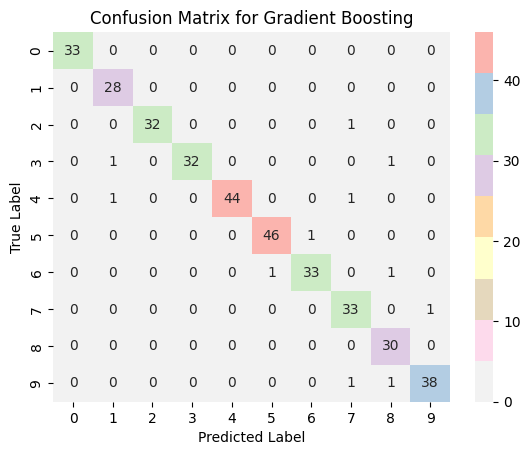


Evaluating default model: AdaBoost



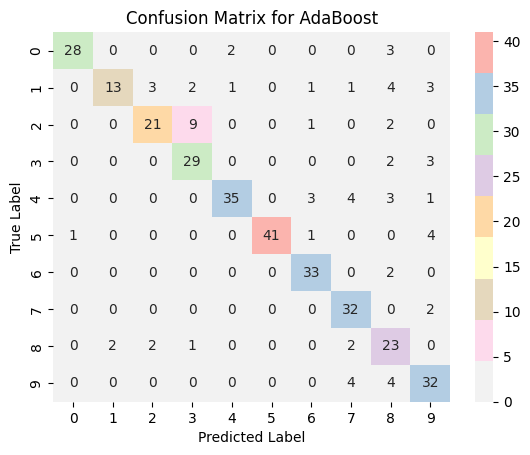


Evaluating default model: Random Forest



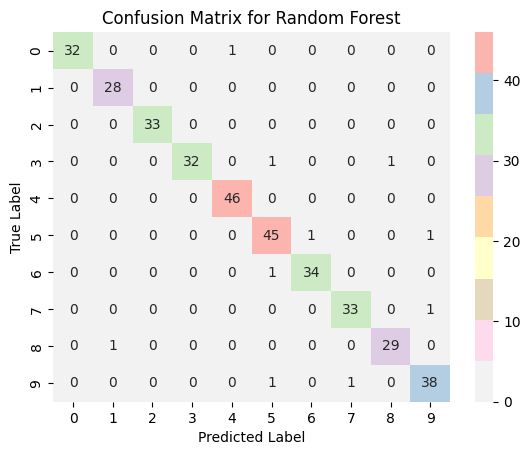


Evaluating default model: Decision Tree



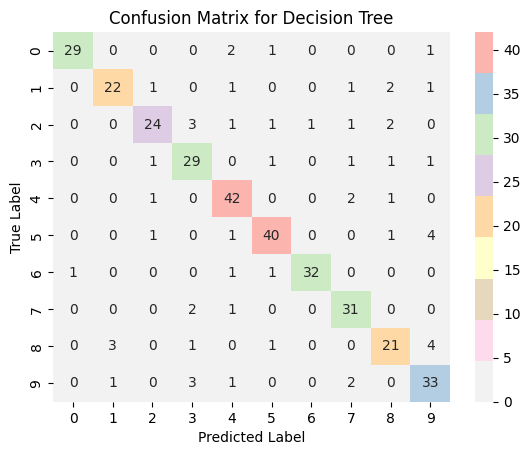


Evaluating default model: Logistic Regression



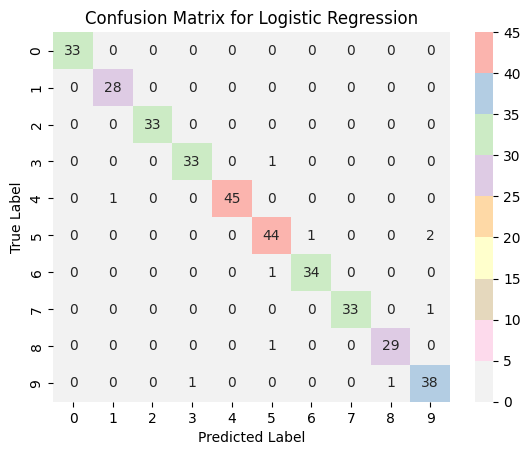


Evaluating default model: KNN



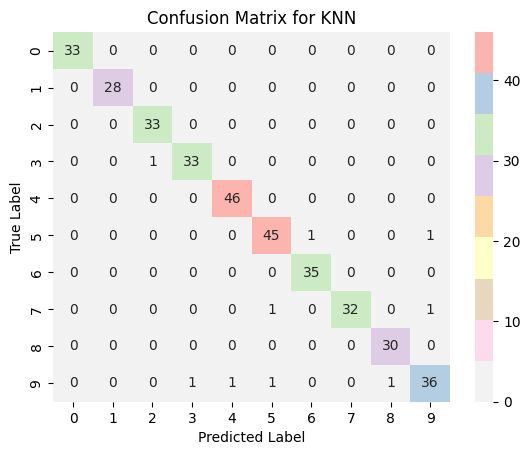


Evaluating default model: Gaussian Naive Bayes



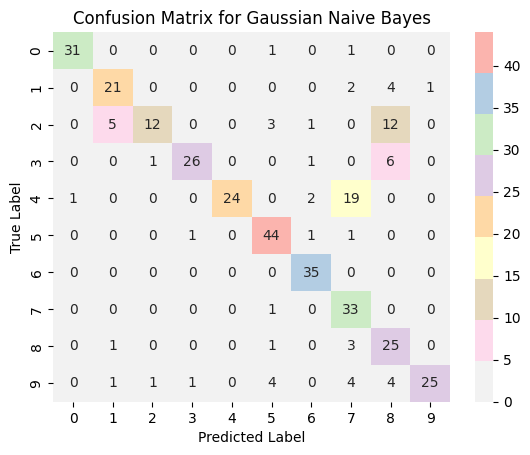


Evaluating default model: SVM



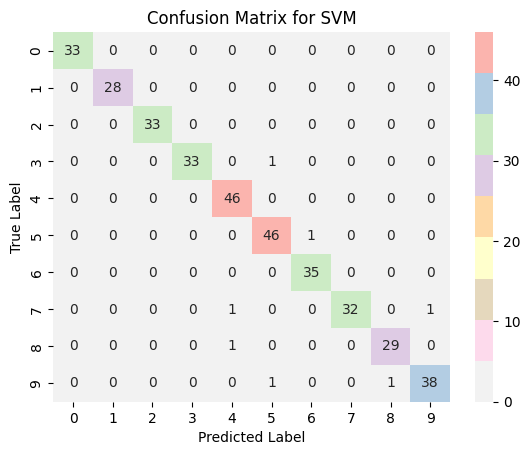


Evaluation Results of the Default Models:

                  Model  Precision    Recall  F1-Score  Accuracy  Balanced Accuracy  Macro ROC AUC
1     Gradient Boosting   0.968276  0.970956  0.969012  0.969444           0.970956       0.999627
2              AdaBoost   0.810458  0.788599  0.786437  0.797222           0.788599       0.968505
3         Random Forest   0.974042  0.972700  0.973207  0.972222           0.972700       0.999540
4         Decision Tree   0.844750  0.835987  0.838460  0.841667           0.835987       0.909167
5   Logistic Regression   0.973720  0.974370  0.973967  0.972222           0.974370       0.999449
6                   KNN   0.976468  0.976921  0.976465  0.975000           0.976921       0.998455
7  Gaussian Naive Bayes   0.816982  0.770457  0.759880  0.766667           0.770457       0.982724
8                   SVM   0.982991  0.980715  0.981652  0.980556           0.980715       0.999681


In [ ]:
# ==============================================================================
# B. Section: Evaluation and Visualization of the Default Models
# Pseudocode:
# 1. First, we loop over all the default models.
# 2. Then we compute evaluation metrics using the Evaluation function above.
# 3. Thereafter, we plot the confusion matrix for each classifier.
# 4. Finally, we create a summary DataFrame to display metrics side-by-side.
# Objective: Visualization and comparison of all models' performances.
# ==============================================================================

# Creating a dictionary to store evaluation results for all the default models
default_results = {}

for name, model in default_models.items():
    print(f"\nEvaluating default model: {name}\n")
    precision, recall, f1, accuracy, bal_acc, macro_auc, all_fpr, mean_tpr, cm = computation_of_metrics(model, X_test, y_test)
    default_results[name] = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'balanced_accuracy': bal_acc,
        'macro_auc': macro_auc,
        'all_fpr': all_fpr,
        'mean_tpr': mean_tpr,
        'confusion_matrix': cm,
    }

    # Plotting the confusion matrix for all the default models
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Pastel1_r')
    plt.title(f'Confusion Matrix for {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Creating a DataFrame to display evaluation metrics for the default models
default_results_df = pd.DataFrame([
    {
        'Model': name,
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score'],
        'Accuracy': metrics['accuracy'],
        'Balanced Accuracy': metrics['balanced_accuracy'],
        'Macro ROC AUC': metrics['macro_auc']
    }
    for name, metrics in default_results.items()
])

# For Index from 1 through 8: Leveraged OpenAI
default_results_df.index = np.arange(1, len(default_results_df) + 1)
print("\nEvaluation Results of the Default Models:\n")
print(default_results_df.to_string(index=True)) #To ensure that index is printed

#______________________________________________________________________________#

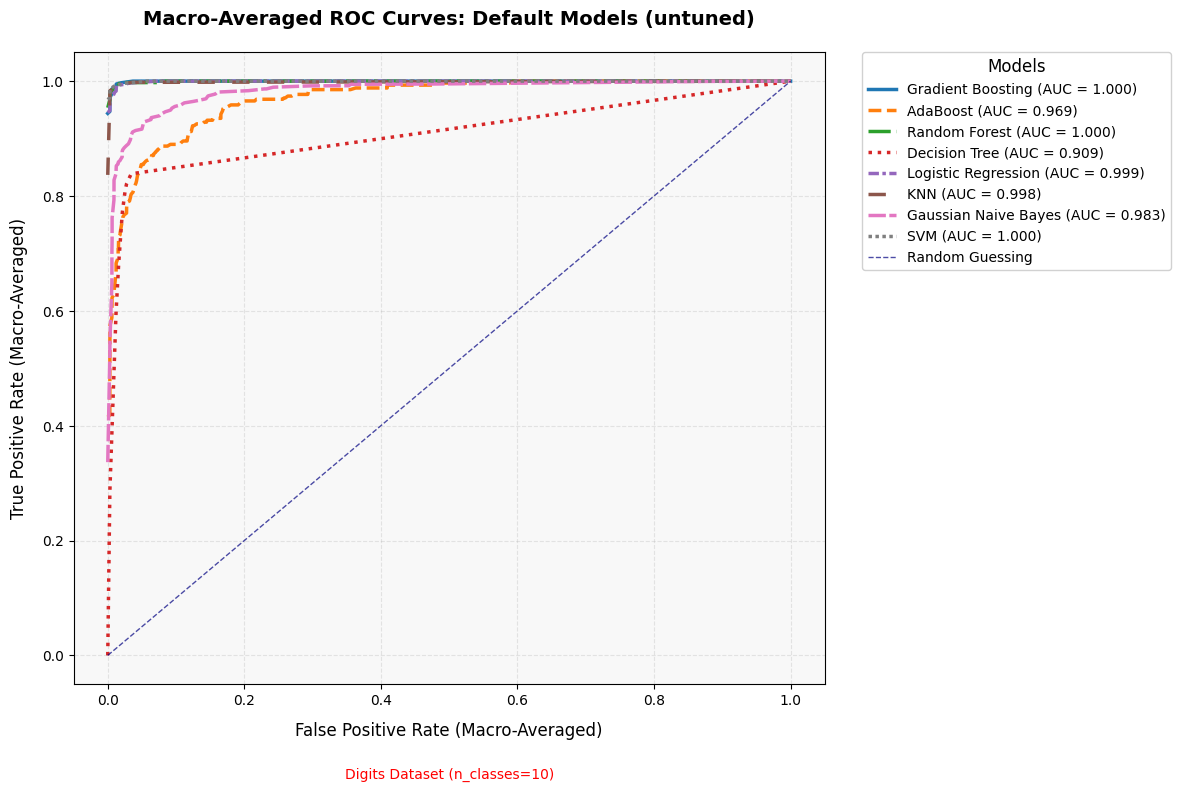

In [ ]:
# ==============================================================================
# C. Section: Plotting a Single Combined Macro-Averaged ROC Curve for all the Default Models
# Pseudocode:
# 1. First, we iterate through all the default models to extract ROC curve data.
# 2. Then we plot all the curves on a single graph with distinct colors and line styles for ease of differentiation.
# 3. Lastly, we add a diagonal reference line to indicate random guessing.
# Aim: To provide a consolidated view of the classifiers' performance.
# ==============================================================================

colors = plt.cm.tab10.colors[:len(default_results)]

# Plotting of different styles of lines is leveraged from OpenAI
plt.figure(figsize=(12, 8), dpi=100)
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5)), (0, (5, 1)), (0, (1, 1))]
for idx, (name, metrics) in enumerate(default_results.items()):
    if metrics['all_fpr'] is not None and metrics['mean_tpr'] is not None:
        plt.plot(
            metrics['all_fpr'],
            metrics['mean_tpr'],
            lw=2.5,
            linestyle=line_styles[idx % len(line_styles)],  # To cycle through various styles
            color=colors[idx],
            label=f'{name} (AUC = {metrics["macro_auc"]:.3f})'
        )

# To style the separation/ diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', alpha=0.7, label='Random Guessing')

plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#f8f8f8')  # Light grey background for the curve

plt.xlabel('False Positive Rate (Macro-Averaged)', fontsize=12, labelpad=10)
plt.ylabel('True Positive Rate (Macro-Averaged)', fontsize=12, labelpad=10)
plt.title('Macro-Averaged ROC Curves: Default Models (untuned)', fontsize=14, pad=20, weight='bold')

# Positioning the Legend outside of the plot
plt.legend(
    bbox_to_anchor=(1.05, 1), # Legend's position achieved through hit & trial method (i.e. position towards the right of the plot)
    loc='upper left',
    borderaxespad=0.,
    frameon=True,
    framealpha=0.9,
    title='Models',
    title_fontsize=12
)

plt.annotate(
    f'Digits Dataset (n_classes={len(np.unique(y_test))})',
    xy=(0.5, -0.15),
    xycoords='axes fraction',
    ha='center',
    fontsize=10,
    color='red'
)

plt.tight_layout()  # To prevent overlapping elements
plt.show()

#______________________________________________________________________________#


Evaluating tuned model: Gradient Boosting



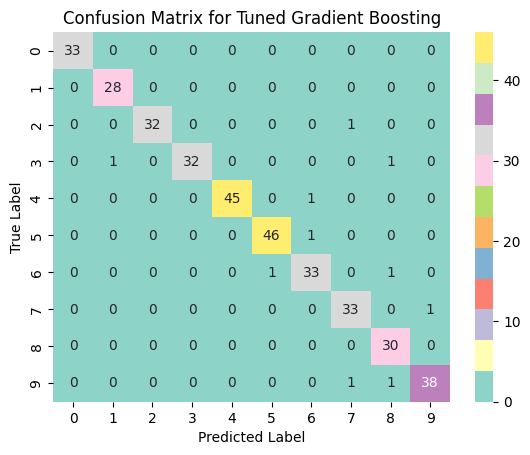


Evaluating tuned model: AdaBoost



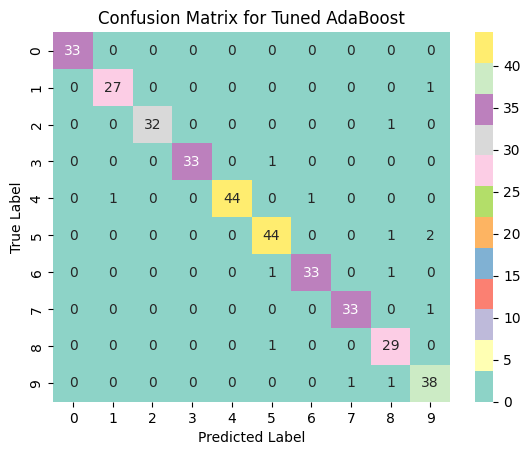


Evaluating tuned model: Random Forest



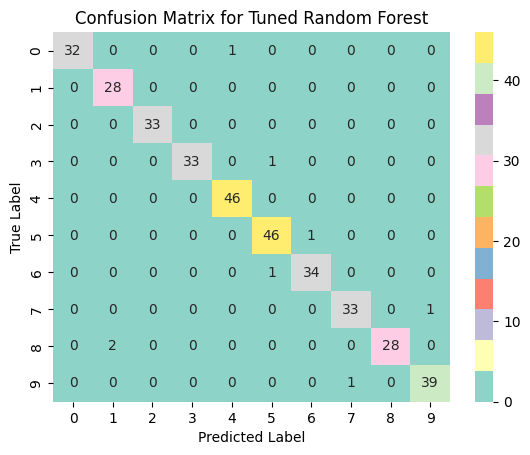


Evaluating tuned model: Decision Tree



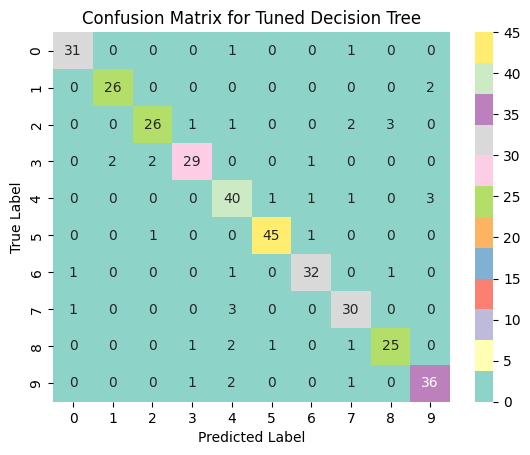


Evaluating tuned model: Logistic Regression



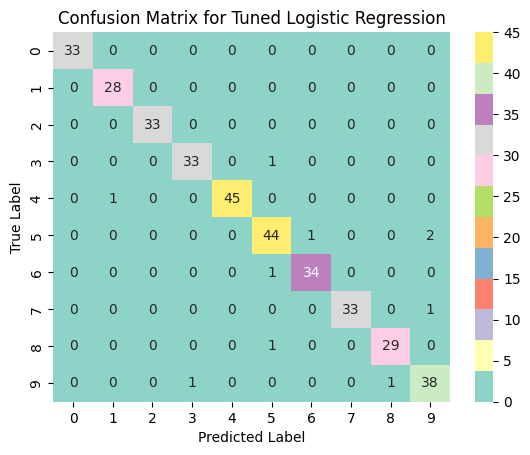


Evaluating tuned model: KNN



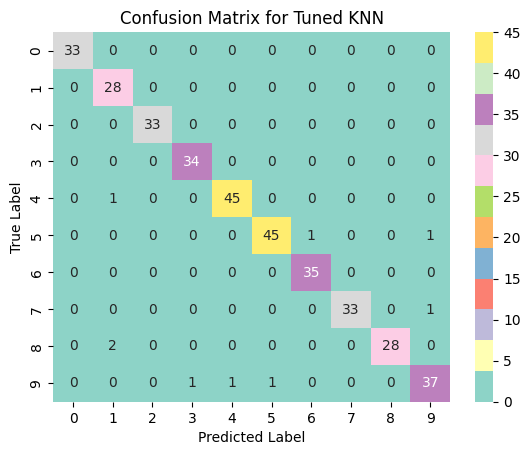


Evaluating tuned model: Gaussian Naive Bayes



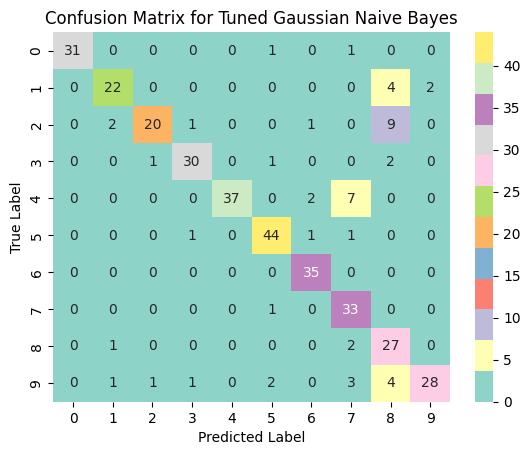


Evaluating tuned model: SVM



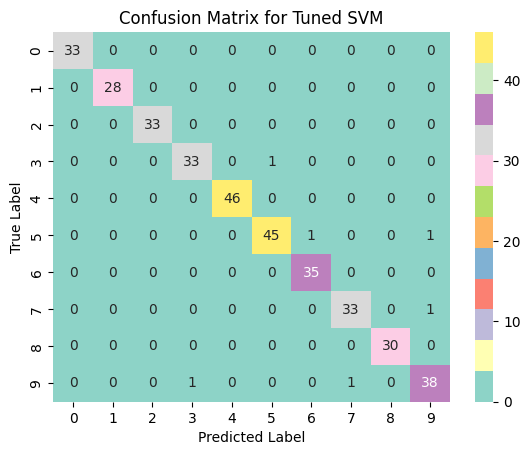


Evaluation Results of the Tuned Models:

                  Model  Precision    Recall  F1-Score  Accuracy  Balanced Accuracy  Macro ROC AUC
1     Gradient Boosting   0.971340  0.973130  0.971829  0.972222           0.973130       0.999634
2              AdaBoost   0.962518  0.962737  0.962250  0.961111           0.962737       0.997595
3         Random Forest   0.978741  0.976936  0.977541  0.977778           0.976936       0.999690
4         Decision Tree   0.891595  0.886577  0.888402  0.888889           0.886577       0.937082
5   Logistic Regression   0.973720  0.974370  0.973967  0.972222           0.974370       0.999402
6                   KNN   0.975212  0.976463  0.975388  0.975000           0.976463       0.992534
7  Gaussian Naive Bayes   0.868215  0.852463  0.848588  0.852778           0.852463       0.985898
8                   SVM   0.984166  0.984862  0.984483  0.983333           0.984862       0.999902


In [ ]:
# ==============================================================================
# D. Section: Evaluation and Visualization of the Tuned Models
# Pseudocode:
# 1. First, we loop over all the tuned models.
# 2. Then we compute evaluation metrics using the Evaluation function above for all the tuned models.
# 3. Thereafter, we plot individual confusion matrices for each classifier.
# 4. Finally, we create a summary DataFrame to display metrics side-by-side.
# Objective: Visualization and comparison of all models' performances.
# ==============================================================================

# Creating a dictionary to store evaluation results for all the tuned models
tuned_results = {}

for name, model in tuned_models.items():
    print(f"\nEvaluating tuned model: {name}\n")
    precision, recall, f1, accuracy, bal_acc, macro_auc, all_fpr, mean_tpr, cm = computation_of_metrics(model, X_test, y_test)
    tuned_results[name] = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'accuracy': accuracy,
        'balanced_accuracy': bal_acc,
        'macro_auc': macro_auc,
        'all_fpr': all_fpr,
        'mean_tpr': mean_tpr,
        'confusion_matrix': cm
    }

    # Plotting the confusion matrix for all the tuned models
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Set3')
    plt.title(f'Confusion Matrix for Tuned {name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

# Creating a DataFrame to display evaluation metrics for the tuned models
tuned_results_df = pd.DataFrame([
    {
        'Model': name,
        'Precision': metrics['precision'],
        'Recall': metrics['recall'],
        'F1-Score': metrics['f1_score'],
        'Accuracy' : metrics['accuracy'],
        'Balanced Accuracy': metrics['balanced_accuracy'],
        'Macro ROC AUC': metrics['macro_auc']
    }
    for name, metrics in tuned_results.items()
])

# For Index from 1 through 8: Leveraged OpenAI
tuned_results_df.index = np.arange(1, len(tuned_results_df) + 1)
print("\nEvaluation Results of the Tuned Models:\n")
print(tuned_results_df.to_string(index=True)) #To ensure that index is printed

#______________________________________________________________________________#

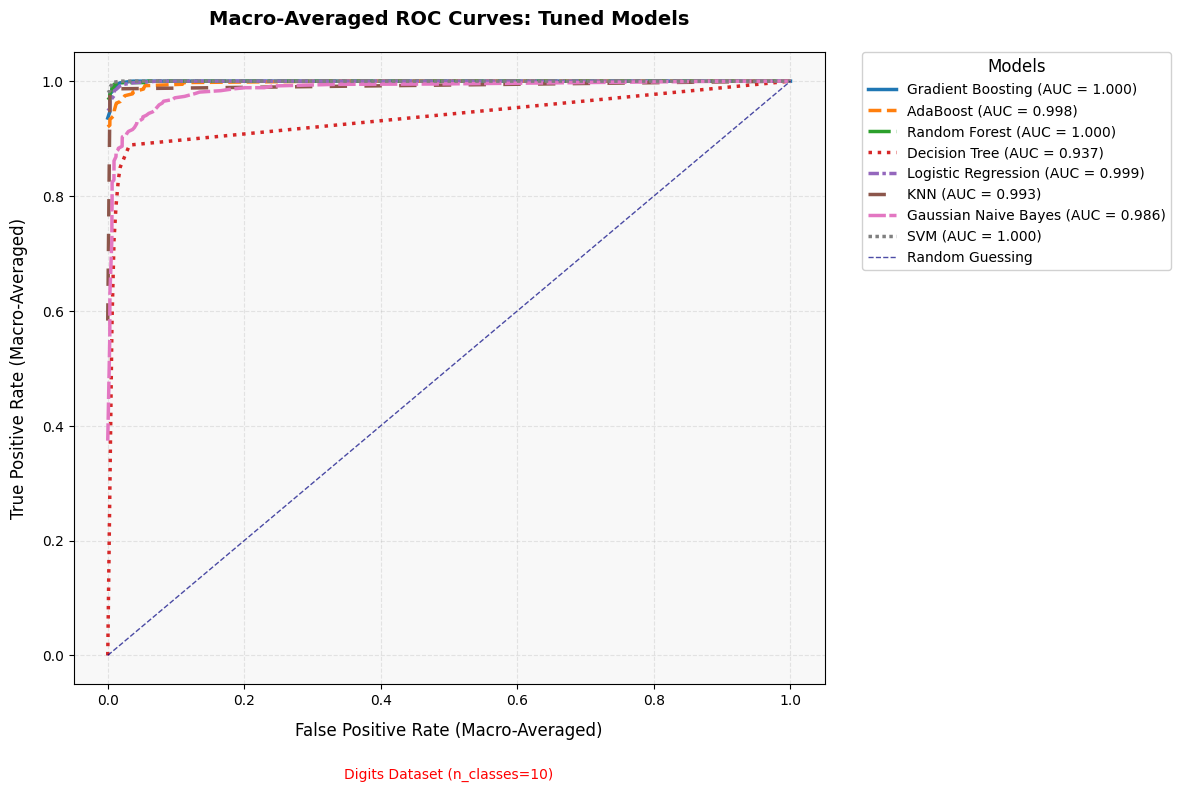

In [ ]:
# ==============================================================================
# E. Section: Plotting a Single Combined Macro-Averaged ROC Curve for all the Tuned Models
# Pseudocode:
# 1. First, we iterate through all the tuned models to extract ROC curve data.
# 2. Then we plot all the curves on a single graph with distinct colors and line styles for ease of differentiation.
# 3. Additionally, we add a diagonal reference line to indicate random guessing.
# 4. Highlight improvements (if any) over the default classifiers.
# Aim: To provide a consolidated view of the classifiers' performance.
# ==============================================================================

colors = plt.cm.tab10.colors[:len(tuned_results)]

# Plotting of different styles of lines is leveraged from OpenAI
plt.figure(figsize=(12, 8), dpi=100)
line_styles = ['-', '--', '-.', ':', (0, (3, 1, 1, 1)), (0, (5, 5)), (0, (5, 1)), (0, (1, 1))]
for idx, (name, metrics) in enumerate(tuned_results.items()):
    if metrics['all_fpr'] is not None and metrics['mean_tpr'] is not None:
        plt.plot(
            metrics['all_fpr'],
            metrics['mean_tpr'],
            lw=2.5,
            linestyle=line_styles[idx % len(line_styles)],  #Cycle through styles
            color=colors[idx],
            label=f'{name} (AUC = {metrics["macro_auc"]:.3f})'
        )

# To style the separation/ diagonal line
plt.plot([0, 1], [0, 1], color='navy', lw=1, linestyle='--', alpha=0.7, label='Random Guessing')

plt.grid(True, linestyle='--', alpha=0.3)
plt.gca().set_facecolor('#f8f8f8')  #Light grey background

plt.xlabel('False Positive Rate (Macro-Averaged)', fontsize=12, labelpad=10)
plt.ylabel('True Positive Rate (Macro-Averaged)', fontsize=12, labelpad=10)
plt.title('Macro-Averaged ROC Curves: Tuned Models', fontsize=14, pad=20, weight='bold')

# Positioning the Legend outside of the plot
plt.legend(
    bbox_to_anchor=(1.05, 1), # Legend's position achieved through hit & trial method (i.e. position towards the right of the plot)
    loc='upper left',
    borderaxespad=0.,
    frameon=True,
    framealpha=0.9,
    title='Models',
    title_fontsize=12
)

plt.annotate(
    f'Digits Dataset (n_classes={len(np.unique(y_test))})',
    xy=(0.5, -0.15),
    xycoords='axes fraction',
    ha='center',
    fontsize=10,
    color='red'
)

plt.tight_layout()  # To prevent overlapping elements
plt.show()

#______________________________________________________________________________#

# References

List any references you may have used in your document before, using one of the established referencing system (e.g. IEEE, Harvard, etc).

1. Alber, S. (2021) 'Logistic Regression'. *UC Davis Health*, pp. 4-6. Available at: https://health.ucdavis.edu/media-resources/ctsc/documents/pdfs/logistic-regression-intro-2021.pdf  
2. Breiman, L. (2001) 'Random forests'. *Machine Learning*, 45(1), pp. 5–32.  
3. Costa, V.G. and Pedreira, C.E. (2023) 'Recent advances in decision trees: an updated survey'. *Artificial Intelligence Review*, 56, pp. 4765–4800. Available at: https://link.springer.com/article/10.1007/s10462-022-10275-5  
4. Cortes, C. and Vapnik, V. (1995) 'Support-vector networks'. *Machine Learning*, 20(3), pp. 273–297.  
5. Cover, T. and Hart, P. (1967) 'Nearest neighbor pattern classification'. *IEEE Transactions on Information Theory*, 13(1), pp. 21–27.  
6. Cox, D.R. (1958) 'The regression analysis of binary sequences (with discussion)'. *Journal of the Royal Statistical Society: Series B (Methodological)*, 20(2), pp. 215–242.  
7. Freund, Y. and Schapire, R.E. (1997) 'A decision-theoretic generalization of on-line learning and an application to boosting'. *Journal of Computer and System Sciences*, 55(1), pp. 119–139.  
8. Friedman, J.H. (2001) 'Greedy function approximation: A gradient boosting machine'. *Annals of Statistics*, 29(5), pp. 1189–1232.  
9. Ke, G. et al. (2017) 'LightGBM: A highly efficient gradient-boosting decision tree'. *Advances in Neural Information Processing Systems*, 30, pp. 3146–3154. Available at: https://www.microsoft.com/en-us/research/publication/lightgbm-a-highly-efficient-gradient-boosting-decision-tree/  
10. Kovács, E.A., Ország, A., Pfeifer, D. and Benczúr, A. (2024) 'Generalised Naïve Bayes'. *arXiv preprint arXiv:2408.15923*, pp. 10–1. Available at: https://arxiv.org/html/2408.15923  
11. Liaw, A. and Wiener, M. (2018) 'Classification and regression by randomForest'. *R News*, 2(3), pp. 18–22. Available at: https://journal.r-project.org/articles/RN-2002-022/  
12. Liu, X. et al. (2023) 'Evaluating machine learning articles'. *JAMA*. Available at: https://annals-csis.org/proceedings/2022/drp/pdf/262.pdf  
13. MathWorks (2023) 'ROC curve and performance metrics'. *MathWorks Documentation*, pp. 10–12. Available at: https://www.mathworks.com/help/stats/performance-curves.html  
14. Mitchell, T.M. (1997) *Machine Learning*. New York: McGraw-Hill.  
15. OpenAI (2024) 'ChatGPT: AI-powered conversational assistant'. *OpenAI Platform*. Available at: https://openai.com/chatgpt  
16. Quinlan, J.R. (1986) 'Induction of decision trees'. *Machine Learning*, 1(1), pp. 81–106.  
17. Riehl, K., Neunteufel, M. and Hemberg, M. (2023) 'Hierarchical confusion matrix for classification performance evaluation'. *Journal of the Royal Statistical Society Series C: Applied Statistics*, pp. 1394–1412. Available at: https://academic.oup.com/jrsssc/article/72/5/1394/7217007  
18. Scikit-learn Developers (2024) 'Supervised learning: Overview of classification and regression'. *Scikit-learn Documentation*. Available at: https://scikit-learn.org/stable/supervised_learning.html  
19. Weiss, A., Młyński, M. and Artiemjew, P. (2022) 'Balanced accuracy curve (BAC) as an alternative for ROC and PR curve'. *Annals of Computer Science and Information Systems*, 30, pp. 149–156. Available at: https://annals-csis.org/proceedings/2022/drp/pdf/262.pdf  
20. Zhang, H. (2017) 'The k-nearest neighbor algorithm in the era of big data'. *Journal of Big Data*, 4(1), pp. 1–20. Available at: https://doi.org/10.1016/j.neunet.2010.05.00  
21. Zhang, Y., Jin, R. and Zhou, Z.H. (2010) 'Understanding support vector machine classifiers: A geometric approach'. *Neural Networks*, 23(6), pp. 727–741. Available at: https://doi.org/10.1016/j.neunet.2010.05.001  
22. Zhu, X. (2020) 'Semi-supervised learning literature survey'. *Computer Science*, 37(1), pp. 1–58. Available at: https://pages.cs.wisc.edu/~jerryzhu/pub/ssl_survey.pdf

#Appendix 1: Use of Generative AI Tools
This notebook was developed with assistance from generative AI tools. The full record of prompts and responses is documented separately and is available in the word file (converted from this .IPYNB notebook) as part of the project submission.